In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shrungapgowda","key":"fc7dd4eefc76495b3b28668d6df94c0b"}'}

In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
!pwd

/content


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d d4rklucif3r/cat-and-dogs

 98% 214M/218M [00:01<00:00, 215MB/s]
100% 218M/218M [00:01<00:00, 219MB/s]


In [ ]:
!unzip cat-and-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/cats/cat.37.jpg  
  inflating: dataset/training_set/cats/cat.370.jpg  
  inflating: dataset/training_set/cats/cat.3700.jpg  
  inflating: dataset/training_set/cats/cat.3701.jpg  
  inflating: dataset/training_set/cats/cat.3702.jpg  
  inflating: dataset/training_set/cats/cat.3703.jpg  
  inflating: dataset/training_set/cats/cat.3704.jpg  
  inflating: dataset/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/c

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Dense,Conv2D,MaxPooling2D,Dropout,Activation
from tensorflow.keras import backend as bk
from tqdm import tqdm
import cv2
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad,Adamax
from tensorflow.keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from PIL import Image

In [ ]:
class_name=["cats","dogs"]
label_name={class_name: i for i, class_name in enumerate(class_name)}

In [ ]:
print(len(label_name))

2


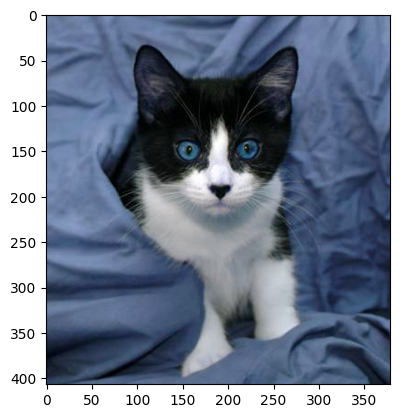

In [ ]:
image_path=cv2.imread("/content/dataset/training_set/cats/cat.1002.jpg")
plt.imshow(image_path)
plt.show()

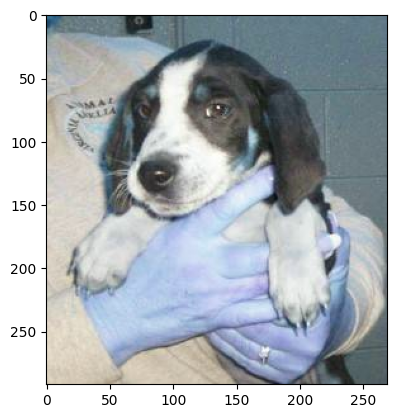

In [ ]:
image_path=cv2.imread("/content/dataset/training_set/dogs/dog.10.jpg")
plt.imshow(image_path)
plt.show()

In [ ]:
image_shape=(128,128)

In [ ]:
def data_set_load():

    data_path=["/content/dataset/training_set/","../content/dataset/test_set/"]

    image_data_output=[]
    for i in data_path:
        image_data=[]
        label_data=[]
        print("Counting:{}".format(i))

        for j in os.listdir(i):
            label=label_name[j]
            for image_data_file in tqdm(os.listdir(os.path.join(i,j))):
                image_path=os.path.join(os.path.join(i,j),image_data_file)
                image=cv2.imread(image_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,image_shape)
                image_data.append(image)
                label_data.append(label)

        image_data=np.array(image_data,dtype="float32")
        label_data=np.array(label_data,dtype="float32")
        image_data_output.append((image_data,label_data))

    return image_data_output

In [ ]:
data_set_load()

Counting:/content/dataset/training_set/


100%|██████████| 4000/4000 [00:10<00:00, 367.97it/s]


Counting:../content/dataset/test_set/


100%|██████████| 1000/1000 [00:02<00:00, 384.24it/s]


[(array([[[[160., 181., 205.],
           [161., 178., 201.],
           [156., 163., 182.],
           ...,
           [ 55.,  61.,  63.],
           [ 50.,  54.,  65.],
           [ 48.,  50.,  58.]],
  
          [[161., 182., 207.],
           [166., 183., 205.],
           [157., 164., 184.],
           ...,
           [ 67.,  70.,  74.],
           [ 59.,  61.,  72.],
           [ 59.,  59.,  67.]],
  
          [[160., 181., 206.],
           [168., 185., 208.],
           [164., 171., 190.],
           ...,
           [ 67.,  68.,  72.],
           [ 73.,  73.,  84.],
           [ 68.,  66.,  75.]],
  
          ...,
  
          [[ 33.,  65.,  60.],
           [ 32.,  57.,  54.],
           [ 29.,  52.,  50.],
           ...,
           [185., 166., 160.],
           [189., 170., 163.],
           [191., 177., 166.]],
  
          [[ 30.,  55.,  53.],
           [ 25.,  50.,  47.],
           [ 26.,  51.,  48.],
           ...,
           [171., 151., 149.],
           [179., 

In [ ]:
(X_train,Y_train),(X_test,Y_test)=data_set_load()

Counting:/content/dataset/training_set/


100%|██████████| 4000/4000 [00:11<00:00, 338.85it/s]


Counting:../content/dataset/test_set/


100%|██████████| 1000/1000 [00:03<00:00, 263.13it/s]


In [ ]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=42)

In [ ]:
_,train_image_label_info=np.unique(Y_train,return_counts=True)
_,test_image_label_info=np.unique(Y_test,return_counts=True)

In [ ]:
print("Train image label information for 0 class  :",train_image_label_info[0])
print("Train image label information for 1 class  :",train_image_label_info[1])

Train image label information for 0 class  : 4000
Train image label information for 1 class  : 4000


In [ ]:
print("Test image label information for 0 class  :",test_image_label_info[0])
print("Test image label information for 1 class  :",test_image_label_info[1])

Test image label information for 0 class  : 1000
Test image label information for 1 class  : 1000


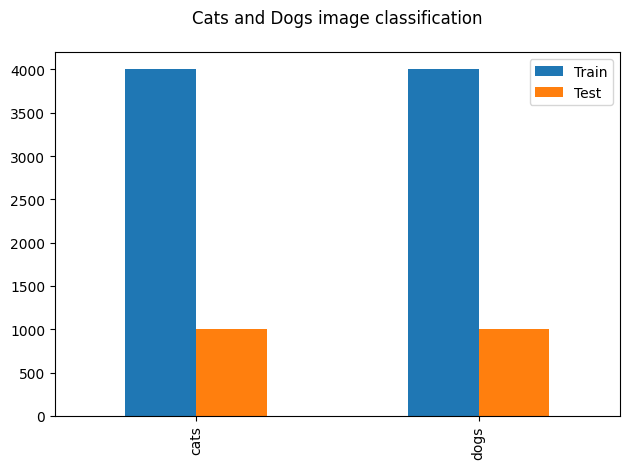

In [ ]:
pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name).plot.bar()
plt.title("Cats and Dogs image classification\n")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
x=pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name)
pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name)

,Train,Test
cats,4000,1000
dogs,4000,1000


In [ ]:
y=(x["Train"][0],x["Train"][1],x["Test"][0],x["Test"][1])
myexplode = [0.2, 0,0.2,0.3]

In [ ]:
my_label=["Cat image_Train ","Dog image_Train","Cat image_Test","Dog image_Test"]
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
# color = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

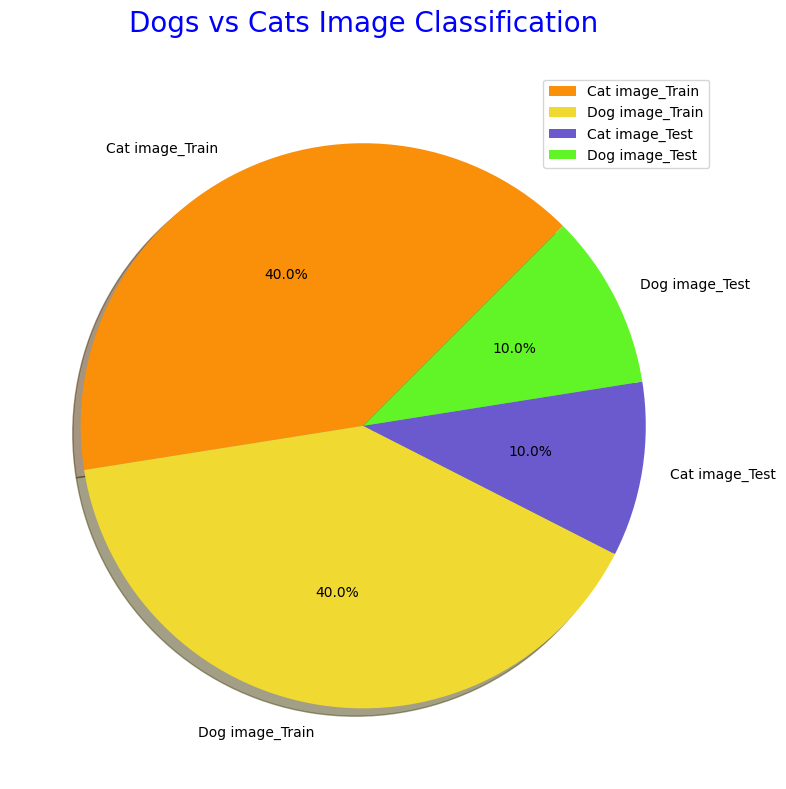

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(y, labels =my_label, shadow = True,colors=color,autopct='%1.1f%%',startangle=45,counterclock=True)
plt.title("Dogs vs Cats Image Classification\n",color="Blue",fontsize=20)
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
train_image=X_train/255.0

In [ ]:
test_image=X_test/255.0

In [ ]:
def RandomImage_visualization(class_names,imagedata_path,imagedata_label):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle("Cats and Dogs Images Visualization\n",color="blue",fontsize=20)

    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.imshow(imagedata_path[i],cmap=plt.cm.BrBG)
        plt.xlabel("Class Names: {}".format(class_names[int(imagedata_label[i])]))
    plt.show()

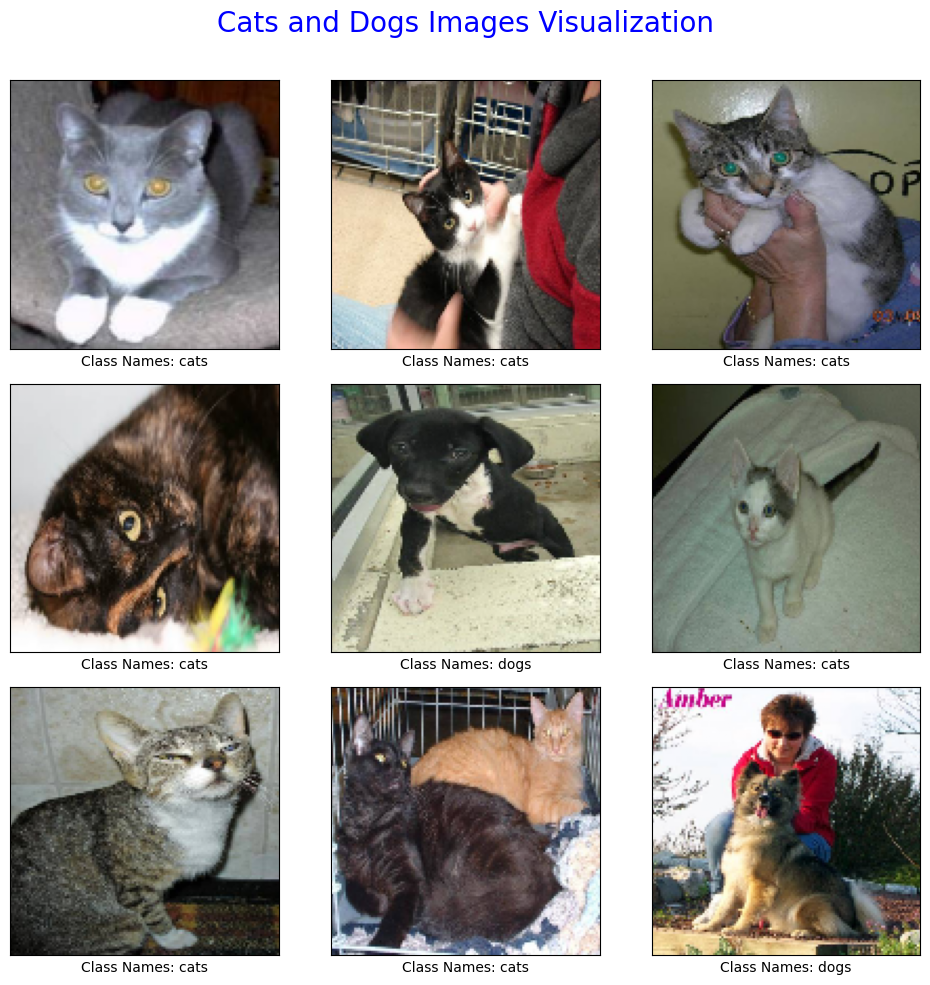

In [ ]:
RandomImage_visualization(class_name,train_image,Y_train)